## LOAD LIBRARIES

In [1]:
#Import all the libraries we need for later use

import numpy as np
import pandas as pd
import nltk
import string
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
#% matplotlib inline
# import sklearn as sk
# uncoment the next line the first time you runthis.
# nltk.download('all') 

### .....................................................................................................................................................................................

## LOAD DATA

In [2]:
# Retrieve cleaned up tweets for further usage
train_tc = pd.read_pickle("./train_tweets_cleaned.pkl")
test_tc = pd.read_pickle("./test_tweets_cleaned.pkl")

### .....................................................................................................................................................................................

In [3]:
def Plot_Sentiments(data):
    sent = data.groupby("Sentiment")
    plt.figure(figsize=(15,10))
    sent.size().sort_values(ascending=False).plot.bar()
    plt.xticks(rotation=50)
    plt.xlabel("Sentiment")
    plt.ylabel("Number of tweets")
    plt.show()

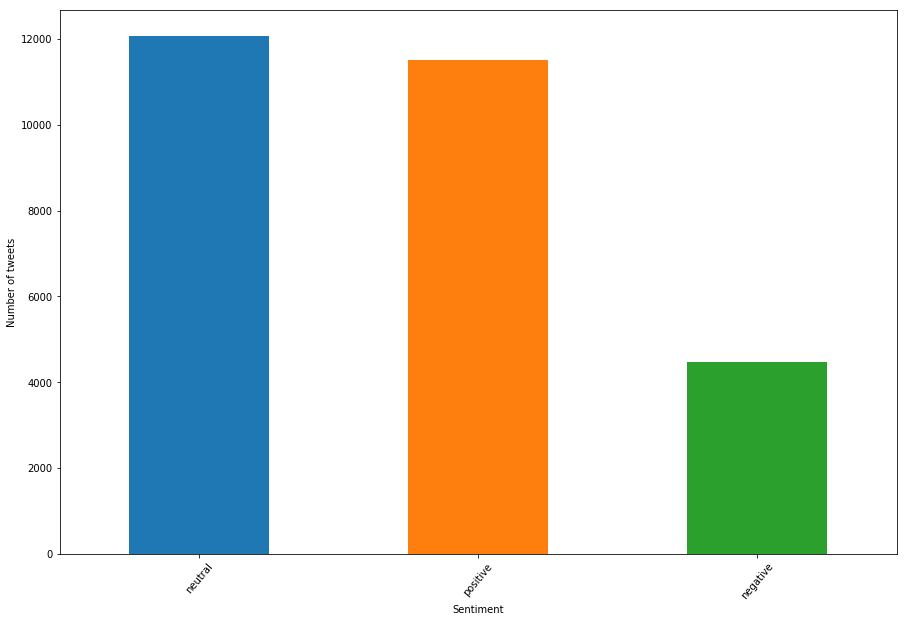

In [4]:
Plot_Sentiments(train_tc)

## WORDCLOUDS

In [5]:
stopwords = set(STOPWORDS)
stopwords.update(["user", "url", "hashtag", "number", "money"])

def Word_Cloud(tweets, tweets_type):
    l2 = [item for item in tweets]
    l2 = [item for sublist in l2 for item in sublist]
    l2 = ' '.join(l2)
    # Create and generate a word cloud image:
    # Display the generated image:
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=200, collocations = False, background_color="white").generate(l2)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Wordcloud For " + tweets_type + " Tweets")
    plt.axis("off")
    plt.show()  

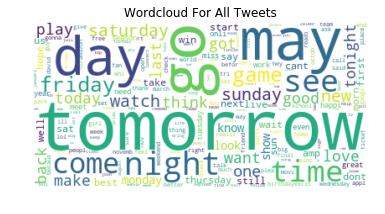

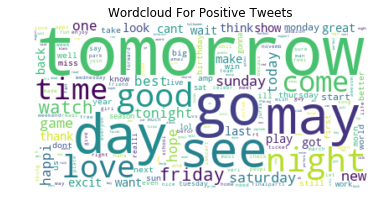

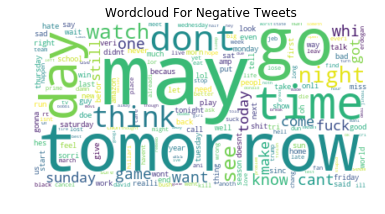

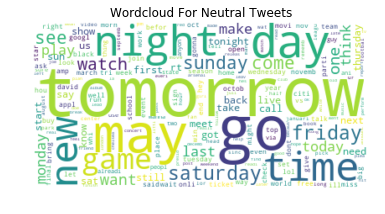

In [6]:
# All tweets
Word_Cloud(train_tc['Tweet'], 'All')
# Positive tweets
positive_tweets = train_tc.loc[train_tc['Sentiment'] == 'positive', 'Tweet']
Word_Cloud(positive_tweets, 'Positive')
# Negative tweets
negative_tweets = train_tc.loc[train_tc['Sentiment'] == 'negative', 'Tweet']
Word_Cloud(negative_tweets, 'Negative')
# Neutral tweets
neutral_tweets = train_tc.loc[train_tc['Sentiment'] == 'neutral', 'Tweet']
Word_Cloud(neutral_tweets, 'Neutral')